In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Programming Exercise 1: Linear Regression

## 1. Linear Regression with One Variable

For this exercise, we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

### 1.1 Plotting the Data

It is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

Note that to account for the intercept term later on in the implementation of gradient descent, we append a column of ones to the left of the matrix $X$.

In [2]:
# Read comma-separated data, no headers
data = pd.read_csv("ex1data1.txt", sep = ",", header = None)

# Separate into X and y values
X = data[0][:, np.newaxis]
y = data[1][:, np.newaxis]

# Add column of 1's to X
m = len(y)
X = np.c_[np.ones((m, 1)), X]

Text(0, 0.5, 'Population of City in 10,000s')

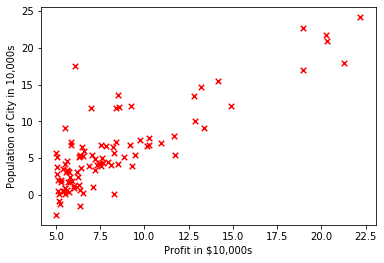

In [96]:
# Plot the data
plt.scatter(X[:, 1], y, marker = "x", c = "red", s = 30)
plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")

### 1.2 Gradient Descent

We perform gradient descent with the intent of minimizing some cost function $J(\theta)$. Thus, it would be useful to implement a function that calculates the cost $J(\theta)$ based on $X$, $y$ and an initial $\theta$.

For linear regression, in particular, the cost function is given by

$\begin{equation}
J(\theta) = \frac{1}{2m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}
\end{equation}$

where the hypothesis $h_{\theta}(x)$ is given by

$\begin{equation}
h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}
\end{equation}$

All these are implemented in the function `computeCost` below.

In [5]:
# computeCost computes the cost of using theta as the parameter for linear regression to fit the data points in X and y
def computeCost(X, y, theta):
    # Initialize values
    m = len(y)
    J = 0
    
    # Compute cost
    prediction = X @ theta
    error = prediction - y
    J = 1 / (2 * m) * np.sum(error ** 2)
    
    return J

In [6]:
# Tests
theta = np.array([0, 0]).reshape(-1, 1)
J = computeCost(X, y, theta)
print("With theta = [0, 0]\nCost computed = ", J)
print("Expected cost value (approx) 32.07\n")

theta = np.array([-1, 2]).reshape(-1, 1)
J = computeCost(X, y, theta)
print("\nWith theta = [-1, 2]\nCost computed = ", J)
print("Expected cost value (approx) 54.24\n")

With theta = [0, 0]
Cost computed =  32.072733877455676
Expected cost value (approx) 32.07


With theta = [-1, 2]
Cost computed =  54.24245508201238
Expected cost value (approx) 54.24



To compute for the values of $\theta$, we make use of batch gradient descent. In batch gradient descent, each iteration performs the update

$\begin{equation}
    \theta_{j} := \theta_{j} - \alpha\frac{1}{2m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}
\end{equation}$

All these are implemented in the function `gradientDescent` below.

In [7]:
# gradientDescent performs gradient descent to learn theta.
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize values
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    # Perform gradient descent
    for i in range(num_iters):
        prediction = X @ theta
        error = prediction - y
        delta = (1 / m) * np.sum(error.T * X.T, axis = 1)[:, np.newaxis]
        theta = theta - alpha * delta
        
        # Save the cost of J in every iteration
        J_history[i, :] = computeCost(X, y, theta)
    
    return theta, J_history

In [100]:
# Test
# Some gradient descent settings
iterations = 1500
alpha = 0.01
theta = np.zeros((2, 1))

# Run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# Print theta
print("Theta found by gradient descent:\n")
print(theta[0, 0], "\n", theta[1, 0], "\n")
print("Expected theta values (approx)\n")
print("-3.6303\n1.1664\n")

Theta found by gradient descent:

-3.63029143940436 
 1.166362350335582 

Expected theta values (approx)

-3.6303
1.1664



To visualize the resulting linear fit, we plot the best-fit line along with the data from earlier.

Text(0, 0.5, 'Population of City in 10,000s')

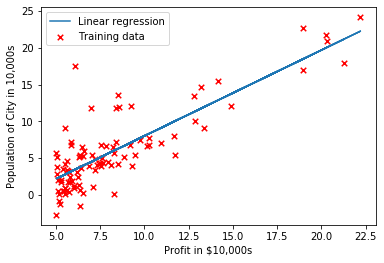

In [101]:
# Plot the data
plt.scatter(X[:, 1], y, marker = "x", c = "red", s = 30, label = "Training data")

# Plot the best-fit line
plt.plot(X[:, 1], X @ theta, label = "Linear regression")

# Annotate graph
plt.legend()
plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")

Furthermore, we can try to visualize the cost function $J(\theta)$ along with its associated contour plot. This is done by the code snippet below.

Text(0.5, 0, '$J(\\theta_{0}, \\theta_{1})$')

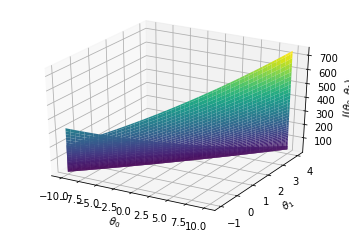

In [102]:
# Set the grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range (len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(-1, 1)
        J_vals[i, j] = computeCost(X, y, t)

# Because of the way meshgrids work, we need to transpose J_vals before plotting, or else the axes will be flipped
J_vals = J_vals.T

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap = "viridis") 

# Annotate figure
ax.set_xlabel("$\\theta_{0}$")
ax.set_ylabel("$\\theta_{1}$")
ax.set_zlabel("$J(\\theta_{0}, \\theta_{1})$")

Text(0, 0.5, '$\\theta_{1}$')

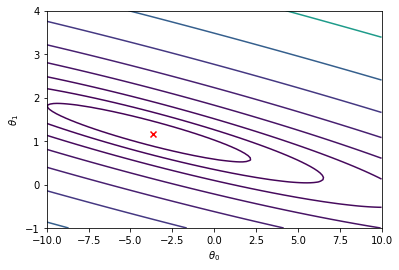

In [103]:
from matplotlib.colors import LogNorm

# Contour plot
plt.contour(theta0_vals ,theta1_vals, J_vals, levels = np.logspace(-2, 3, 20))

# Plot optimal theta
plt.scatter(theta[0, 0], theta[1, 0], marker = "x", color = "red");

# Annotate plot
plt.xlabel("$\\theta_{0}$")
plt.ylabel("$\\theta_{1}$")

The purpose of these graphs is to show you that how $J(\theta)$ varies with changes in $\theta_{0}$ and $\theta_{1}$ . The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_{0}$ and $\theta_{1}$, and each step of gradient descent moves closer to this point.

## 2. Linear Regression with Multiple Variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [132]:
# Read comma-separated data, no headers
data = pd.read_csv("ex1data2.txt", sep = ",", header = None)

# Separate into X and y values
X = data[[0, 1]]
y = data[2][:, np.newaxis]

### 2.1 Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Thus, we perform feature scaling on the data in the following manner:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

This is implemented in the function `featureNormalize` below.

In [133]:
# featureNormalize returns a normalized version of X where the mean value of each feature is 0 and the standard 
# deviation is 1. This is often a good preprocessing step to do when working with learning algorithms.

def featureNormalize(X):
    # Initialize values
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    # Get mean and standard deviation
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    
    # Normalize
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [134]:
# Test
X, mu, sigma = featureNormalize(X)

# Add column of 1's to X
m = len(y)
X = np.c_[np.ones((m, 1)), X]

X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

### 2.2 Gradient Descent

As before, we implement batch gradient descent, using the equations from earlier. Because the code from earlier has been properly vectorized, we can use the same functions `computeCost` and `gradientDescent` in the multivariate case.

In [142]:
# Test
# Some gradient descent settings
alpha = 0.01
num_iters = 600
theta = np.zeros((3, 1))

# Run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Print theta
print("Theta found by gradient descent:\n")
print(theta[0, 0], "\n", theta[1, 0], "\n", theta[2, 0], "\n")

Theta found by gradient descent:

339593.9639653116 
 105328.65385743103 
 -2467.4410363806533 



To ascertain that we have the correct $\theta$'s, we plot the $J(\theta)$ vs. number of iterations and see if the cost converges as we increase the number of iterations.

Text(0, 0.5, '$J(\\theta)$')

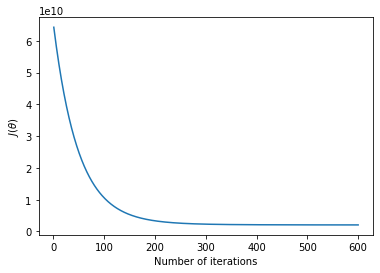

In [143]:
# Plot the convergence graph
plt.plot(range(1, num_iters + 1), J_history)
plt.xlabel("Number of iterations")
plt.ylabel("$J(\\theta)$")

#### 2.2.1 Selecting Learning Rates

We now try out different learning rates for the dataset and find a learning rate that converges quickly. In this case,  we try values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).

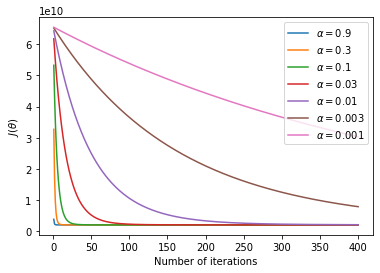

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111)

for alpha in [0.9, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]:
    # Some gradient descent settings
    num_iters = 400
    theta = np.zeros((3, 1))

    # Run gradient descent
    theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

    # Plot the convergence graph
    ax.plot(range(1, num_iters + 1), J_history, label = "$\\alpha = $" + str(alpha))
    ax.set_xlabel("Number of iterations")
    ax.set_ylabel("$J(\\theta)$")
    
ax.legend()

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, we find that gradient descent takes a very long time to converge to the optimal value. With a large learning rate, however, gradient descent converges in a short number of iterations and does not even diverge, as we might expect.

From the graph, we find that the algorithm converges fastest when $\alpha$ = 0.9. As such, we choose this value and get the corresponding values of the $\theta$'s.

In [147]:
# Test
# Some gradient descent settings
alpha = 0.9
num_iters = 400
theta = np.zeros((3, 1))

# Run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Print theta
print("Theta found by gradient descent:\n")
print(theta[0, 0], "\n", theta[1, 0], "\n", theta[2, 0], "\n")

Theta found by gradient descent:

340412.6595744681 
 109447.7964696418 
 -6578.354854161277 



### 2.3 Normal Equations

The closed-form solution to the linear regression problem is given by:

$\begin{equation}
\theta = (X^{T}X)^{-1}X^{T}y
\end{equation}$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.

We use the formula above to calculate $\theta$ in the function `normalEqn` below.

In [148]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return theta

In [149]:
# Test

# Initialize X (unnormalized)
X = data[[0, 1]]
m = len(y)
X = np.c_[np.ones((m, 1)), X]

# Run gradient descent
theta = normalEqn(X, y)

# Print theta
print("Theta computed from the normal equations:\n")
print(theta[0, 0], "\n", theta[1, 0], "\n", theta[2, 0], "\n")

Theta computed from the normal equations:

89597.9095427962 
 139.21067401762548 
 -8738.019112327602 

